In [2]:
import pandas as pd
import numpy
import ast
import random
import json
import random

import matplotlib.pyplot as plt

In [3]:
businesses = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)

In [4]:
businesses

In [5]:
for busi in businesses:
    business = busi
    break

In [6]:
business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."


In [7]:
##Helper functions for Reservoir Sampling

def sample(stream,k):
    """
    Returns @param n random items from @param iterable.
    """
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element
    return reservoir
def sample_df(df,k):
    index = sample(range(len(df)),k)
    return df.iloc[index]

In [8]:
business = business[business['categories'].str.contains('Restaurant.*')==True].reset_index()
business = sample_df(business,2000)
business.shape

(2000, 15)

In [9]:
def jsonConversion(attr, key):
    if attr == None:
        return ast.literal_eval("{}") 
    if key in attr:
        return ast.literal_eval(attr.pop(key))


In [10]:
business['BusinessParking'] = business.apply(lambda x: jsonConversion(x['attributes'], 'BusinessParking'), axis=1)

business['Ambience'] = business.apply(lambda x: jsonConversion(x['attributes'], 'Ambience'), axis=1)

business['GoodForMeal'] = business.apply(lambda x: jsonConversion(x['attributes'], 'GoodForMeal'), axis=1)

business['Dietary'] = business.apply(lambda x: jsonConversion(x['attributes'], 'Dietary'), axis=1)

business['Music'] = business.apply(lambda x: jsonConversion(x['attributes'], 'Music'), axis=1)




In [11]:
att_dum = business['attributes'].apply(pd.Series)
bp_dum = business['BusinessParking'].apply(pd.Series)
amb_dum = business['Ambience'].apply(pd.Series)
gfm_dum = business['GoodForMeal'].apply(pd.Series)
diet_dum = business['Dietary'].apply(pd.Series)

business_attr= pd.concat([ att_dum, bp_dum, amb_dum, gfm_dum,diet_dum ], axis=1)




In [12]:
#EDA - count the number of nulls each attr has

#business_attr

na_sum = business_attr.isna().sum().sort_values(ascending = False)
na_sum
#drop some of the attributes based on null counts

AgesAllowed                   1999
Open24Hours                   1997
RestaurantsCounterService     1996
DietaryRestrictions           1992
Smoking                       1873
ByAppointmentOnly             1869
CoatCheck                     1857
BYOB                          1853
GoodForDancing                1852
BYOBCorkage                   1845
Corkage                       1838
BestNights                    1832
DriveThru                     1811
BusinessAcceptsBitcoin        1746
DogsAllowed                   1536
WheelchairAccessible          1460
HappyHour                     1436
RestaurantsTableService       1220
brunch                         972
dessert                        967
latenight                      962
lunch                          908
breakfast                      907
dinner                         876
Caters                         608
divey                          605
BikeParking                    589
NoiseLevel                     559
trendy              

In [13]:
#examine business_category
business_categories_before_dummy = pd.Series(business['categories'])
business_categories_before_dummy 

36427                 Italian, Pizza, Seafood, Restaurants
15704                          Pizza, Italian, Restaurants
9772                              Steakhouses, Restaurants
48743    Nightlife, Lounges, Bars, Sports Bars, Pizza, ...
29882    Restaurants, Mediterranean, Arabian, Middle Ea...
                               ...                        
16236      Sushi Bars, Japanese, Korean, Restaurants, Food
20175    Sushi Bars, Specialty Food, Ethnic Food, Resta...
37735                                 Restaurants, Chinese
3810     Breakfast & Brunch, American (Traditional), Ca...
1999     Beer Bar, Waffles, Bars, Restaurants, Mexican,...
Name: categories, Length: 2000, dtype: object

In [14]:
business_attr = pd.get_dummies(business_attr)

business_categories = pd.Series(business['categories']).str.get_dummies(',')

In [15]:
business_categories

,Acai Bowls,Active Life,Adult Education,Afghan,African,American (New),American (Traditional),Arabian,Arcades,Argentine,...,Transportation,Turkish,Ukrainian,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wine Bars,Wraps
36427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29882,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3810,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


36427    4.0
15704    2.0
9772     2.5
48743    3.0
29882    4.0
        ... 
16236    2.5
20175    3.5
37735    3.5
3810     4.0
1999     4.0
Name: stars, Length: 2000, dtype: float64

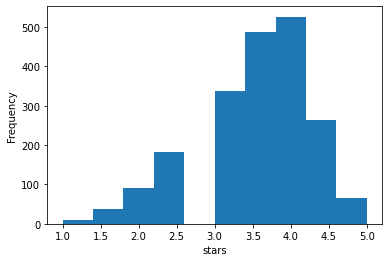

In [16]:

#EDA-distribution of business ratings
business['stars'].plot.hist()

plt.xlabel('stars')
business['stars']



<AxesSubplot:>

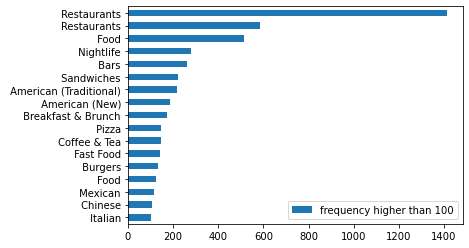

In [17]:
#EDA-distribution of category counts
mysum = business_categories[business_categories.columns].sum(axis = 0).sort_values(ascending = True)
df_category_count = pd.DataFrame(mysum, columns=['frequency higher than 100'])
df_category_count_filtered = df_category_count[df_category_count['frequency higher than 100'] >= 100] 

df_category_count_filtered.plot(kind="barh", fontsize=10)

<AxesSubplot:>

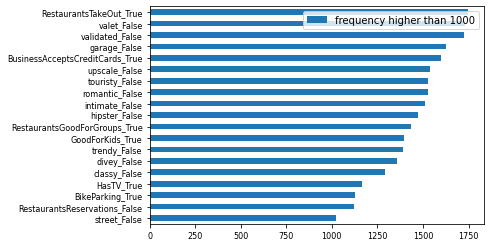

In [18]:
#EDA-distribution of attr counts
#INCORRECT DUE TO -1 VALUES
mysum = business_attr[business_attr.columns].sum(axis = 0).sort_values(ascending = True)
df_attr_count = pd.DataFrame(mysum, columns=['frequency higher than 1000'])
df_attr_count_filtered = df_attr_count[df_attr_count['frequency higher than 1000'] >= 1000] 

df_attr_count_filtered.plot(kind="barh", fontsize=8)


In [19]:
business_dummies = pd.concat([business_attr,business_categories, 
                              #pd.Series(business['business_id']),
                              pd.Series(business['stars']) ],axis =1)


In [20]:
business_dummies

,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',NoiseLevel_None,NoiseLevel_u'average',NoiseLevel_u'loud',...,Turkish,Ukrainian,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wine Bars,Wraps,stars
36427,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
15704,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.0
9772,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.5
48743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
29882,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.5
20175,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.5
37735,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.5
3810,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.0


In [21]:
#cosine simularity
#from sklearn.metrics.pairwise import linear_kernel
#similarity_matrix = linear_kernel(business_dummies,business_dummies)
#similarity_matrix 
#index mapping

#mapping = pd.Series(business.index,index = business['name'])
#def recommend_resturants_based_on_plot(input):
 #   r_index = mapping[input]
    #get similarity values with other movies
    #similarity_score is the list of index and similarity matrix
  #  similarity_score = list(enumerate(similarity_matrix[r_index]))
    #sort in descending order the similarity score of movie inputted with all the other movies
   # similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar movies. Ignore the first movie.
    #similarity_score = similarity_score[1:15]
    #return movie names using the mapping series
   # indices = [i[0] for i in similarity_score]
   # return (business['name'].iloc[indices])

#recommend_resturants_based_on_plot('Radar')


In [22]:
business_dummies.to_csv('business_dummies.csv')

# EDA - user & review table




<AxesSubplot:>

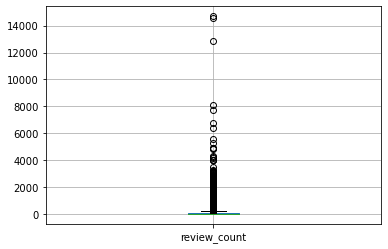

In [23]:
#Load user table(From clean CSVs by Yuxi)
user = pd.read_csv('user_clean.csv')
user_review_count = user['review_count']#.sort_values(ascending = False)
#review_count box plot
user.boxplot(column = 'review_count')
#user['review_count'].plot(kind="barh", fontsize=8)


In [24]:
#compute summary statiscs
user['review_count'].describe()

count    30339.000000
mean       107.408814
std        295.103569
min          1.000000
25%          8.000000
50%         25.000000
75%         91.000000
max      14691.000000
Name: review_count, dtype: float64

(0.0, 2000.0)

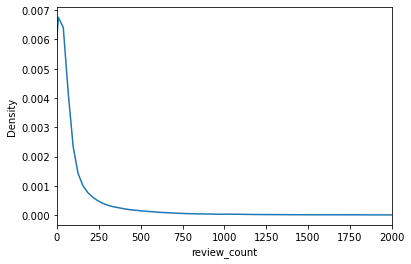

In [25]:
#review count distribution curve
user['review_count'].plot.kde()
plt.xlabel('review_count')
plt.xlim([0, 2000])

#comments: very skewed 

In [26]:
#load review table (From clean CSVs by Yuxi)
review = pd.read_csv('review_clean.csv')
review

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,42,lJ7rzbvT-l8KO8lHfEsXsg,LV1ME-ibA2h0IGyFUUWhaQ,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,Incredible donuts. Sometimes you have to go ea...,2017-08-07 19:34:13
1,45,m-9DK7NwYedIPj1RQ_sXdw,JuM-lH05m6Ln8OPUTg8p0g,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,"Dont bother going to voodoo, just come here in...",2016-09-18 17:06:01
2,86,kCyJd4kZ_nzf67myR6ZbBA,u0x3SXagjYDbI2N4sgJ0Tw,CoZmZKv2lCYd-UoAsAUobA,4.0,0,0,0,This restaurant is delicious! I've had Ethiopi...,2015-10-07 21:21:56
3,138,3jP94-9GxXNmH4r4TcggBg,lljqZVYkVdfLvjaaCWVIQQ,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,Wow!!! Absolutely the BEST donuts I've EVER ha...,2017-04-07 22:44:08
4,149,pEUPD5fqKX2_VlQCh6palg,SLqeSHh2uHSW4Ok1G9H_3g,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,This is a place to be in the morning while vis...,2017-08-16 04:52:34
...,...,...,...,...,...,...,...,...,...,...
33083,1999611,5GuRBLAg2RH4fE9_cOum-Q,QBQ1GMB6Yn3YIiZSCOVHpw,ajIz_TiYWUk1LRcpsPlUjA,3.0,0,0,0,One of the better pizza places in the area. I ...,2017-02-27 15:52:55
33084,1999737,eg_d6eClmDz9H3Q0HP-8_A,1dtrpw0-N4Fa6ogO4XItTw,Unnftblo4FM6CQb6uBNMZQ,4.0,1,0,0,They were at my office complex for lunch.\n\nT...,2015-03-11 17:48:55
33085,1999760,brJm1PaM_pHYIvyEfHzNbQ,FRp4IiV3Er9mgXodot0wzw,7SycaqyogmuU8hmlgR6kvw,4.0,0,0,0,one of the nicer Anytime Fitness gyms I have s...,2018-01-04 01:51:09
33086,1999931,4GDo0IceIna__OkOymuXSA,m2Mg99PhKztYgYufaewbng,MGzro82Fi4LYvc86acoONQ,5.0,1,0,1,"I'm not a barbecue person, but I figured if th...",2017-04-14 16:30:46


Text(0.5, 0, 'stars')

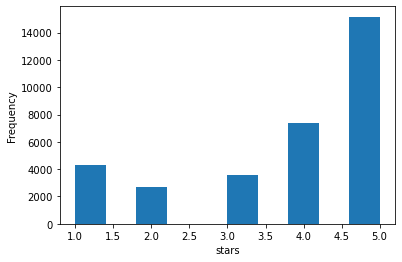

In [27]:
#distribution of stars in all the reviews
review['stars'].plot.hist()
plt.xlabel('stars')

# review text analysis

In [63]:
#use review table
#split into 5 
review_high = review[review['stars']==5.0]
review_low = review[review['stars']==1.0]
review_high

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,42,lJ7rzbvT-l8KO8lHfEsXsg,LV1ME-ibA2h0IGyFUUWhaQ,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,Incredible donuts. Sometimes you have to go ea...,2017-08-07 19:34:13
1,45,m-9DK7NwYedIPj1RQ_sXdw,JuM-lH05m6Ln8OPUTg8p0g,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,"Dont bother going to voodoo, just come here in...",2016-09-18 17:06:01
3,138,3jP94-9GxXNmH4r4TcggBg,lljqZVYkVdfLvjaaCWVIQQ,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,Wow!!! Absolutely the BEST donuts I've EVER ha...,2017-04-07 22:44:08
4,149,pEUPD5fqKX2_VlQCh6palg,SLqeSHh2uHSW4Ok1G9H_3g,H_RM2u1WWGU1HkKZrYq2Ow,5.0,0,0,0,This is a place to be in the morning while vis...,2017-08-16 04:52:34
9,472,buUrgudeysSalXFS8aStrw,ogIWfjk1j7HlUb1_7n27Kg,D8-ssK_8w1WBajKCXUG5Uw,5.0,2,0,0,"The Ice Box is where Johnny's used to be, righ...",2012-04-28 23:11:49
...,...,...,...,...,...,...,...,...,...,...
33079,1999374,0vbJ5jElOQwQdgz1Nw2L5w,6QFhH_M-keYT1iSO3UDUYg,MGzro82Fi4LYvc86acoONQ,5.0,0,0,0,"Like every Austinite should, my husband and I ...",2015-08-04 21:48:16
33080,1999421,27PkiT8wGV_8f45lqhh2XQ,fdsCAYdfCxPjEbIrSpNB3w,rL_BIbMZ1-2MLZsL8UPyhw,5.0,0,0,0,Very helpful and professional. Today I brought...,2015-10-13 17:55:37
33081,1999490,KaG18gnnolBpa6o1dJ-SuQ,6hr-58aUT6OJbApw683TyA,4dD3Ffj8ei19KgRyCDtW-w,5.0,0,0,0,Even though late this evening great service an...,2016-07-21 02:32:42
33086,1999931,4GDo0IceIna__OkOymuXSA,m2Mg99PhKztYgYufaewbng,MGzro82Fi4LYvc86acoONQ,5.0,1,0,1,"I'm not a barbecue person, but I figured if th...",2017-04-14 16:30:46


In [79]:
#define a function to process text into a list of tokens
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re

def process_text(text):
    #the function takes a string and return a list of cleaned words.

    #remove some non-meaningful things 
    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr, '', text)
    text = re.sub('[0-9]+', '', text)
    #special treatment
    text = re.sub("n't",'',text)
    text = re.sub("'s",'',text)
    text = re.sub("'ve",'',text)
    text = re.sub("'",'',text)
    text = re.sub("''",'',text)
    text = re.sub("would",'',text)
    text = re.sub("could",'',text)
    text = re.sub("get",'',text)
    
    
    #tokenize
    tokenized = nltk.word_tokenize(text)
    #print("after tokenization: \n ", tokenized)
    

    #stopwords & punc
    stop_words = set(stopwords.words('english'))
    nopunc = [char for char in tokenized if char not in string.punctuation]
    nopunc = ' '.join(nopunc)
    filtered_text = [word for word in nopunc.split() if len(word)>=3 if not word.lower() in stop_words]
    #print("after stop words filtering: \n ", filtered_text)

    #stemming
    #stemmer = SnowballStemmer('english')
    #lemmatizer = WordNetLemmatizer()
    result = []
    for i in filtered_text:
        #stemmed_word = stemmer.stem(i)
        #lemmatized = lemmatizer.lemmatize(stemmed_word)
        result.append(i)

    return result
   

In [80]:
#create CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_1 = CountVectorizer(analyzer=process_text)
matrix_high = vectorizer_1.fit_transform(review_high['text'])
vectorizer_2 = CountVectorizer(analyzer=process_text)
matrix_low = vectorizer_2.fit_transform(review_low['text'])
df_matrix_high = pd.DataFrame(matrix_high.toarray(),columns = vectorizer_1.get_feature_names())
df_matrix_low = pd.DataFrame(matrix_low.toarray(),columns = vectorizer_2.get_feature_names())
df_matrix_high

,++++++,+/-,+Fresh,+Selection,+Very,+hours,+huge,+the,+years,",-Back",...,だいぶ売れてしまったようで、種類もかなり少なめでしたが、メープルベーコン、ブルーベリーバジル、レモンポピーシードなど、大好きなドーナッツをゲットできました。,できたてだから美味しいのかと思ったが半日経ってからたべてもやはり美味しい。,シナモンシュガー、スパイス、ラズベリーケーキを持ち帰り。,チキンサラダサブは美味しいので何度も食べてる。他のも美味しい。かなりお気に入りです。,メープルベーコンは日本にはなかったので、ものすごく久々に食べられて幸せでした。,夕方に行ったからか、行列もなく、ガラガラ。,大袈裟に言っているわけではなく、私が世界で一番好きなドーナツです。,完全オープンキッチンに自信のほどが伺える。,日本から撤退してしまった、ブルースタードーナツ。,次はいつ食べられるのかな。。。
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#frequency of each words
word_sum_high = df_matrix_high.sum().sort_values(ascending=False)[:500]
word_sum_low = df_matrix_low.sum().sort_values(ascending=False)[:500]
word_sum_high

great       6137
place       5904
good        5248
food        4909
time        4486
            ... 
simple       257
maybe        256
mattress     256
remember     255
pleasant     254
Length: 500, dtype: int64

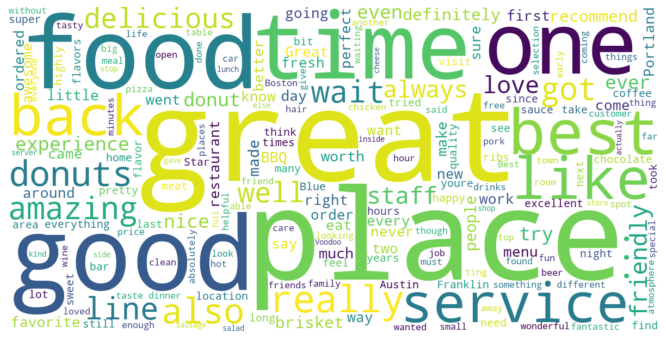

In [97]:
#Make word cloud for cool visuals
#comments: need to figure out why there's weird words on there

import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict_high=word_sum_high.to_dict()
text2_dict_low=word_sum_low.to_dict()

# create the WordCloud object
wordcloud_1 = WordCloud(min_word_length =3,stopwords = STOPWORDS,
                      background_color='white',width=1200, height=600)
wordcloud_2 = WordCloud(min_word_length =3,stopwords = STOPWORDS,
                      background_color='white',width=1200, height=600)

# generate the word cloud
wordcloud_1.generate_from_frequencies(text2_dict_high)
wordcloud_2.generate_from_frequencies(text2_dict_low)

#plot
plt.figure( figsize=(12,6) )
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

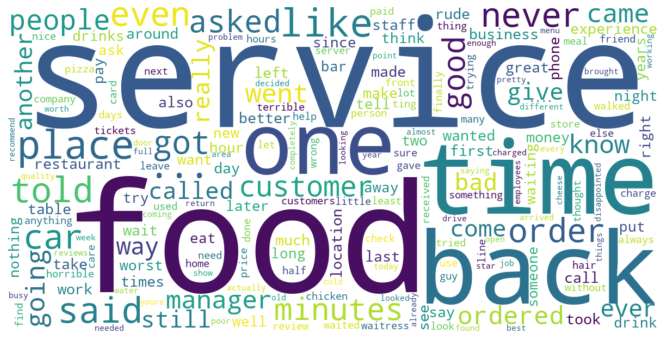

In [98]:
plt.figure( figsize=(12,6) )
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.show()